In [ ]:
#install depenencies
!pip install kaggle

In [ ]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jety2021329206","key":"035bf7ada73bdcf7e45954662d427def"}'}

In [ ]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#import the dataset we want to use for our project
!kaggle competitions download -c aptos2019-blindness-detection

aptos2019-blindness-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#lets see the imported files from kaggle competetion
!ls

aptos2019-blindness-detection.zip  kaggle.json	sample_data


# **Colab Utilization Specifications**

In [ ]:
#Disk Information of Colab
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   37G   42G  47% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  885M  55% /usr/sbin/docker-init
tmpfs           6.4G  156K  6.4G   1% /var/colab
/dev/sda1        50G   39G   12G  77% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
#CPU Specs
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.146
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [ ]:
#Memory Specs
!cat /proc/meminfo

MemTotal:       13294200 kB
MemFree:          262576 kB
MemAvailable:   11880960 kB
Buffers:           67896 kB
Cached:         11493736 kB
SwapCached:            0 kB
Active:           745964 kB
Inactive:       11653544 kB
Active(anon):       1068 kB
Inactive(anon):   838200 kB
Active(file):     744896 kB
Inactive(file): 10815344 kB
Unevictable:           4 kB
Mlocked:               4 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               492 kB
Writeback:             0 kB
AnonPages:        837904 kB
Mapped:           272736 kB
Shmem:              1388 kB
KReclaimable:     383712 kB
Slab:             455720 kB
SReclaimable:     383712 kB
SUnreclaim:        72008 kB
KernelStack:        4364 kB
PageTables:        18228 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647100 kB
Committed_AS:    2003276 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       73160 kB
VmallocChunk:          0 kB
Percpu:          

# **The VM used for Colaboratory**


> **RAM:** 13 GB


> **CPU:** 2 vCPU (when checking using psutil - so a n1-highmem-2 instance)



> **CPU Type:** 2-core Xeon 2.2GHz


> **Maximum Lifetime of a VM:** 12 Hours


> **Idle VMs Time Out:** After 90 mins




In [ ]:
from psutil import *
print(cpu_count())
print(cpu_stats())
print(virtual_memory())

2
scpustats(ctx_switches=2555250, interrupts=2557725, soft_interrupts=3007083, syscalls=0)
svmem(total=13613260800, available=12165730304, percent=10.6, used=1112723456, free=268374016, active=763895808, inactive=11933360128, buffers=69525504, cached=12162637824, shared=1421312, slab=466591744)


# **Start**

# **Unzip Data**

In [ ]:
!unzip  aptos2019-blindness-detection


# **Load Training and Test Information in Dataframes**

In [ ]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


# **Base Line**

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64



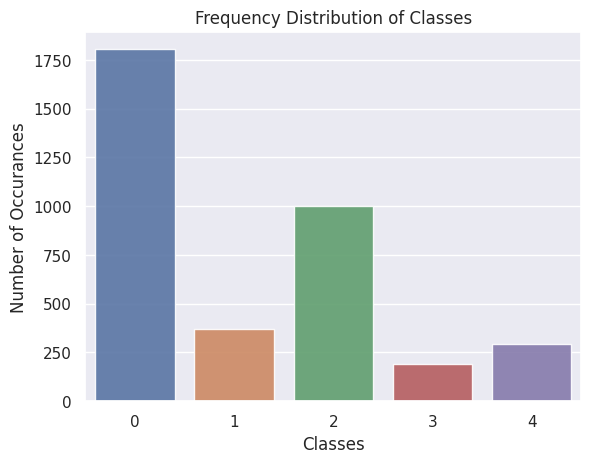

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(x=Class_Frequency_Count.index,y=Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

# **Directory Structure Creation**

In [ ]:
#!rm -rf Validation_Dir

In [ ]:
import os

train_keyword = 'Training_Dir'
validation_keyword = 'Validation_Dir'
keywords = [train_keyword,validation_keyword]
dir_list = df_train['diagnosis'].tolist()

for keyword in keywords:
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  for class_dir in dir_list:
    if(not os.path.exists(keyword+'/'+str(class_dir))):
      os.mkdir(keyword+'/'+str(class_dir))

In [ ]:
split = int(0.8 * len(df_train))

train_dataframe = df_train.iloc[:split]
val_dataframe = df_train.iloc[split:]

train_images = train_dataframe['id_code'].tolist()
train_labels = train_dataframe['diagnosis'].tolist()
val_images = val_dataframe['id_code'].tolist()
val_labels = val_dataframe['diagnosis'].tolist()

In [ ]:
import shutil as cf
image_list = []
class_list = []
for keyword in keywords:
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  if keyword == train_keyword:
    image_list = train_images
    class_list = train_labels
  elif keyword == validation_keyword:
    image_list = val_images
    class_list = val_labels
  for image_info in image_list:
    cl = class_list[image_list.index(image_info)]
    cf.copy('train_images/'+str(image_info)+'.png', keyword+'/'+str(cl))

# **Fine Tuning Model**

In [ ]:
from keras.applications import VGG16


vgg_conv = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Freeze the layers except the last 2 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7e9764bf98a0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e9716a0bca0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e97168c4460> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e97168c5210> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e97168c5a80> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e97168c5de0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e97168c72e0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e97168c7b50> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e97168c6d40> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e97168c6980> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e970c0ada50> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e97168c7670> False
<keras.src.layers.convolutional.conv2d.Conv2D ob

In [ ]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

train_dir = 'Training_Dir'
validation_dir = 'Validation_Dir'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 60

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

2.14.0
Found 2929 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


In [ ]:
# Create the model
model = keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new custom layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation= tf.nn.softmax))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

In [ ]:
# Regular Model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

W0714 23:15:29.924794 139963654322048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
30/29 [==============================] - 425s 14s/step - loss: 1.3575 - acc: 0.4963 - val_loss: 0.9633 - val_acc: 0.6794
Epoch 2/10
30/29 [==============================] - 392s 13s/step - loss: 0.9499 - acc: 0.6662 - val_loss: 0.8563 - val_acc: 0.7244
Epoch 3/10
30/29 [==============================] - 403s 13s/step - loss: 0.9467 - acc: 0.6756 - val_loss: 0.8990 - val_acc: 0.7203
Epoch 4/10
30/29 [==============================] - 397s 13s/step - loss: 0.8608 - acc: 0.7030 - val_loss: 0.8446 - val_acc: 0.7312
Epoch 5/10
30/29 [==============================] - 394s 13s/step - loss: 0.8326 - acc: 0.6995 - val_loss: 0.7548 - val_acc: 0.7258
Epoch 6/10
30/29 [==============================] - 395s 13s/step - loss: 0.8183 - acc: 0.7079 - val_loss: 0.8341 - val_acc: 0.7353
Epoch 7/10
30/29 [==============================] - 392s 13s/step - loss: 0.8143 - acc: 0.7150 - val_loss: 0.7469 - val_acc: 0.7394
Epoch 8/10
30/29 [==============================] - 394s 13s/step - loss: 0.

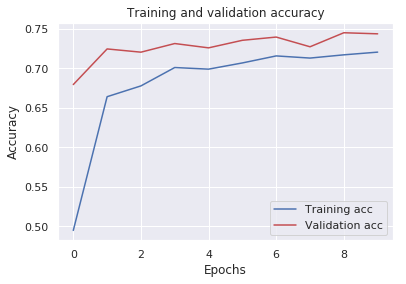

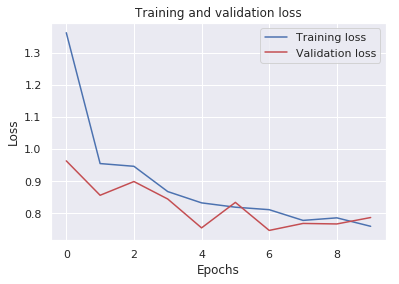

In [ ]:
# Plot

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Max Accuracy

print("Validation Accuracy:", max(history.history['val_acc']))
print("Training Accuracy", max(history.history['acc']))

Validation Accuracy: 0.7448840366440125
Training Accuracy 0.7203823853450735


In [ ]:
from keras.preprocessing import image
test_list=df_test['id_code'].tolist()
test_image = []
for i in test_list:
    img = image.load_img('Test_Images/'+i+'.png',target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X = np.array(test_image)

In [ ]:
pred_class = []
for class_prob in y_prob:
  class_prob = class_prob.tolist()
  pred_class.append(class_prob.index(max(class_prob)))
df_test['diagnosis'] = pred_class

# **Base Line Model**

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64



Text(0.5, 0, 'Classes')

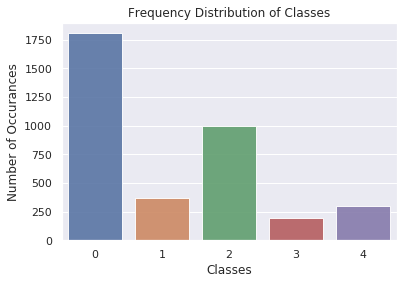

In [ ]:
Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(x=Class_Frequency_Count.index,y=Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)

# **Predicted Model**

2    971
0    713
1    244
Name: diagnosis, dtype: int64



Text(0.5, 0, 'Classes')

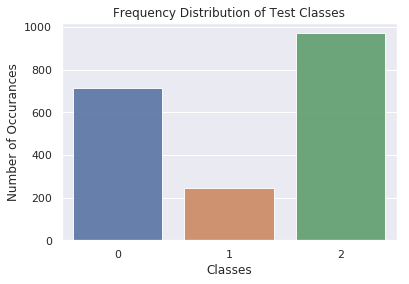

In [ ]:
Class_Test_Frequency_Count = df_test['diagnosis'].value_counts()
print(str(Class_Test_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(x=Class_Test_Frequency_Count.index,y=Class_Test_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Test Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)